In [4]:
%matplotlib inline
import engine
dist = engine.distributions
import matplotlib.pyplot as plt

# import torch
import numpy as np
import numpyro

from sims.gaussian_noise import GaussianNoise
from engine.algorithms.abc import RejectionABC

In [5]:
num_simulations = 10000
threshold = 0.1

In [6]:
engine.set_rng_seed(101)

# obs = torch.tensor([[1.]])

@engine.simulator(name='gn', simulator_fn=GaussianNoise())
def model():
    inputs = engine.sample('input', dist.Normal(loc=np.array([0.]),
                                                scale=np.array([1.])))
    outputs = engine.simulate('gn', inputs, obs=obs)
    return inputs, outputs

abc = RejectionABC(
    model=model,
    threshold=threshold,
    num_samples=num_simulations)

TypeError: 'NoneType' object is not callable

In [14]:
posterior = abc.run()

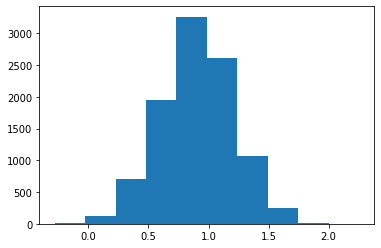

In [15]:
plt.figure()
plt.hist( posterior.marginal('input').empirical['input']._get_samples_and_weights()[0].numpy().flatten())
plt.show()